<center>  <h1>Principle Component Analysis (PCA)</h1></center>

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [3]:
digits = datasets.load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
len(digits.data)

1797

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

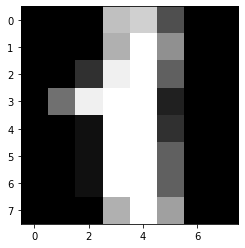

In [9]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[1],cmap="gray")

In [10]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [11]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [12]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)

In [13]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
new_scaled_data = scaler.fit_transform(df)

In [16]:
new_scaled_data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [17]:
df_new = pd.DataFrame(new_scaled_data,columns=digits.feature_names)

In [18]:
df_new

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf = DecisionTreeClassifier()

In [23]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
clf.get_depth()

13

In [25]:
y_pred = clf.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred = y_pred,y_true=y_test)

0.8333333333333334

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[38  0  0  0  0  0  0  0  1  0]
 [ 0 31  1  1  0  0  0  0  1  1]
 [ 0  3 42  1  2  1  0  1  2  0]
 [ 0  3  1 41  0  2  0  0  2  2]
 [ 0  1  0  1 37  0  1  1  1  1]
 [ 0  0  0  1  0 36  2  1  0  2]
 [ 0  1  0  0  0  0 40  0  0  0]
 [ 0  1  0  3  1  0  1 40  0  1]
 [ 0 10  0  5  0  0  2  0 41  0]
 [ 0  4  0  1  0  0  0  3  5 29]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.57      0.89      0.70        35
           2       0.95      0.81      0.88        52
           3       0.76      0.80      0.78        51
           4       0.93      0.86      0.89        43
           5       0.92      0.86      0.89        42
           6       0.87      0.98      0.92        41
           7       0.87      0.85      0.86        47
           8       0.77      0.71      0.74        58
           9       0.81      0.69      0.74        42

    accuracy                           0.83       450
   macro avg       

In [28]:
def decision(X,Y):
    x_train,x_test,y_train,y_test = train_test_split(X,Y)
    clf = DecisionTreeClassifier()
    clf.fit(x_train,y_train)
    print(clf.get_depth())
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_pred = y_pred,y_true=y_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=32)

In [31]:
x_pca = pca.fit_transform(df_new)

In [32]:
decision(x_pca,digits.target)

17
0.8222222222222222
[[39  2  0  0  1  1  1  0  0  3]
 [ 0 41  2  1  0  0  0  2  1  3]
 [ 0  4 31  2  0  0  0  0  2  1]
 [ 0  1  0 32  0  1  0  2  0  5]
 [ 2  0  0  1 38  1  0  0  0  1]
 [ 1  0  0  1  1 32  1  1  2  3]
 [ 1  0  1  0  0  2 32  1  4  1]
 [ 0  1  2  0  0  0  0 44  0  0]
 [ 0  4  0  1  0  0  1  0 39  1]
 [ 1  2  0  2  0  3  1  0  1 42]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        47
           1       0.75      0.82      0.78        50
           2       0.86      0.78      0.82        40
           3       0.80      0.78      0.79        41
           4       0.95      0.88      0.92        43
           5       0.80      0.76      0.78        42
           6       0.89      0.76      0.82        42
           7       0.88      0.94      0.91        47
           8       0.80      0.85      0.82        46
           9       0.70      0.81      0.75        52

    accuracy                           0.82       4

In [33]:
pca = PCA(n_components=45)
x_pca = pca.fit_transform(df_new)
decision(x_pca,digits.target)

19
0.8333333333333334
[[46  1  0  0  1  1  1  0  1  1]
 [ 0 43  0  0  0  1  2  0  0  0]
 [ 0  1 28  0  0  2  2  1  0  0]
 [ 0  0  0 31  1  1  0  1  1  3]
 [ 0  4  0  0 30  0  0  0  1  0]
 [ 1  0  0  2  1 45  0  0  1  3]
 [ 1  1  0  2  0  0 39  0  2  0]
 [ 0  0  2  3  1  0  0 41  2  0]
 [ 0  4  0  1  0  1  0  0 38  5]
 [ 0  3  0  0  1  4  0  1  6 34]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.75      0.93      0.83        46
           2       0.93      0.82      0.87        34
           3       0.79      0.82      0.81        38
           4       0.86      0.86      0.86        35
           5       0.82      0.85      0.83        53
           6       0.89      0.87      0.88        45
           7       0.93      0.84      0.88        49
           8       0.73      0.78      0.75        49
           9       0.74      0.69      0.72        49

    accuracy                           0.83       4

In [34]:
pca = PCA(n_components=16)
x_pca = pca.fit_transform(df_new)
decision(x_pca,digits.target)

15
0.8177777777777778
[[40  1  0  1  3  0  1  0  1  0]
 [ 0 45  3  0  0  0  1  1  5  0]
 [ 0  1 39  3  1  0  3  1  2  0]
 [ 0  0  0 38  0  1  0  0  0  4]
 [ 0  0  0  0 33  1  3  1  3  0]
 [ 1  0  0  1  1 38  2  0  1  1]
 [ 0  1  0  1  1  0 48  0  1  0]
 [ 0  0  0  2  1  0  0 29  1  0]
 [ 2  5  1  1  2  2  0  0 27  3]
 [ 0  5  0  1  1  1  0  0  2 31]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        47
           1       0.78      0.82      0.80        55
           2       0.91      0.78      0.84        50
           3       0.79      0.88      0.84        43
           4       0.77      0.80      0.79        41
           5       0.88      0.84      0.86        45
           6       0.83      0.92      0.87        52
           7       0.91      0.88      0.89        33
           8       0.63      0.63      0.63        43
           9       0.79      0.76      0.77        41

    accuracy                           0.82       4

In [35]:
pca = PCA(n_components=8)
x_pca = pca.fit_transform(df_new)
decision(x_pca,digits.target)

23
0.8244444444444444
[[37  0  0  1  2  0  1  0  1  0]
 [ 1 30  1  0  1  0  2  0  4  0]
 [ 2  0 41  1  0  0  0  1  0  0]
 [ 0  0  1 36  0  0  0  1  1  3]
 [ 2  2  1  0 44  0  0  1  0  1]
 [ 0  0  0  1  0 32  0  0  2  4]
 [ 1  2  0  0  0  0 52  0  0  0]
 [ 0  0  0  2  0  0  0 41  0  1]
 [ 0  4  3  6  1  3  1  0 23  6]
 [ 1  0  0  3  0  2  0  1  4 35]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.79      0.77      0.78        39
           2       0.87      0.91      0.89        45
           3       0.72      0.86      0.78        42
           4       0.92      0.86      0.89        51
           5       0.86      0.82      0.84        39
           6       0.93      0.95      0.94        55
           7       0.91      0.93      0.92        44
           8       0.66      0.49      0.56        47
           9       0.70      0.76      0.73        46

    accuracy                           0.82       4

In [36]:
pca = PCA(n_components=4)
x_pca = pca.fit_transform(df_new)
decision(x_pca,digits.target)

19
0.7888888888888889
[[46  1  0  0  0  1  2  0  0  0]
 [ 0 38  2  0  0  0  0  2  1  0]
 [ 0  1 41  2  0  1  0  0  4  0]
 [ 0  0  5 39  0  2  0  0  5  1]
 [ 0  0  0  0 34  0  1  2  2  1]
 [ 0  0  0  1  0 28  0  1  6  3]
 [ 0  3  0  0  0  0 48  0  1  0]
 [ 0  0  0  4  0  4  0 29  3  1]
 [ 0  2  5  3  0  5  0  1 26  2]
 [ 1  2  3  8  0  0  0  0  0 26]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.81      0.88      0.84        43
           2       0.73      0.84      0.78        49
           3       0.68      0.75      0.72        52
           4       1.00      0.85      0.92        40
           5       0.68      0.72      0.70        39
           6       0.94      0.92      0.93        52
           7       0.83      0.71      0.76        41
           8       0.54      0.59      0.57        44
           9       0.76      0.65      0.70        40

    accuracy                           0.79       4

In [37]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df_new)
decision(x_pca,digits.target)

28
0.5266666666666666
[[33  0  0  0  1  0  7  0  3  1]
 [ 0 24  1  1  2  4  0  3  7  3]
 [ 0  1 22  7  0  2  0  0  1  3]
 [ 0  1  9 21  0  6  0  3  2  5]
 [ 5  0  0  2 36  1  0  0  2  0]
 [ 3  8  4  5  0  7  0  5  7  7]
 [ 8  0  0  0  0  0 43  0  0  0]
 [ 0  2  0  4  1  2  0 24  4  8]
 [ 1  8  3  3  0  3  0  2 13  9]
 [ 0  4  5  5  0  9  0  5  5 14]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.69        45
           1       0.50      0.53      0.52        45
           2       0.50      0.61      0.55        36
           3       0.44      0.45      0.44        47
           4       0.90      0.78      0.84        46
           5       0.21      0.15      0.17        46
           6       0.86      0.84      0.85        51
           7       0.57      0.53      0.55        45
           8       0.30      0.31      0.30        42
           9       0.28      0.30      0.29        47

    accuracy                           0.53       4

In [38]:
def decision(X,Y):
    x_train,x_test,y_train,y_test = train_test_split(X,Y)
    clf = DecisionTreeClassifier()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    return accuracy_score(y_pred = y_pred,y_true=y_test),clf.get_depth()

In [39]:
accuracy = []
depth = []
for n_comp in  range(1,65):
    pca = PCA(n_components=n_comp)
    x_pca = pca.fit_transform(df_new)
    acc,d = decision(x_pca,digits.target)
    accuracy.append(acc)
    depth.append(d)

In [40]:
x = np.arange(1,65)

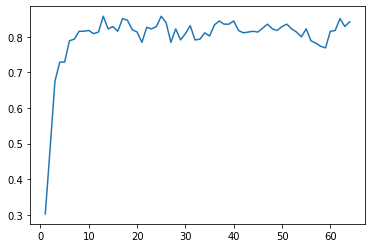

In [41]:
plt.plot(x,accuracy)

In [42]:
print("max accuracy = ",max(accuracy), "\nat n_components ",accuracy.index(max(accuracy)))

max accuracy =  0.8577777777777778 
at n_components  12


In [43]:
print("min accuracy = ",min(accuracy), "\nat n_components ",accuracy.index(min(accuracy)))

min accuracy =  0.3022222222222222 
at n_components  0


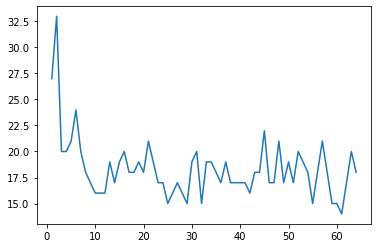

In [44]:
plt.plot(x,depth)

In [45]:
min(depth)

14

In [46]:
print("max depth = ",max(depth), "\nat n_components ",depth.index(max(depth)))

max depth =  33 
at n_components  1


In [47]:
print("min depth = ",min(depth), "\nat n_components ",depth.index(min(depth)))

min depth =  14 
at n_components  60


In [49]:
# help()